In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join("data","mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
study_data = pd.merge(mouse, clinical, on="Mouse ID", how="outer")

# Display the data table for preview
study_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
#Tumor Response Mean
# Create the tumor mean dataframe
tumor_data = study_data.groupby(["Drug", "Timepoint"]) ["Tumor Volume (mm3)"]
tumor_mean = tumor_data.mean()
tumor_mean = tumor_mean.reset_index()

#Pivot tumor mean dataframe
tumor_mean_pivot = tumor_mean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

#Preview tumor standard error dataframe
tumor_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [3]:
#Tumor Response Standard Error
#Create the tumor standard error dataframe
tumor_se = tumor_data.sem()
tumor_se = tumor_se.reset_index()

#Pivot tumor standard error dataframe
tumor_se_pivot = tumor_se.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

#Preview tumor standard error dataframe
tumor_se_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


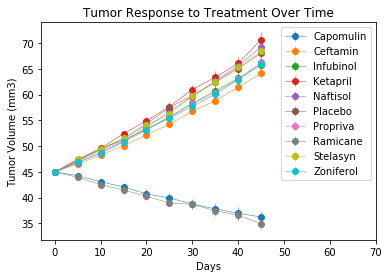

In [8]:
#Tumor Response Scatter Plot
#Create tumor x axis
total_time = tumor_mean_pivot.index[-1]
x_axis = np.arange(0, total_time + 5, 5)

#Create tumor y axis and plot tumor data
drugs = tumor_mean_pivot.columns

fig, ax = plt.subplots()

for drug in drugs:
    error = tumor_se_pivot[drug]
    mean = tumor_mean_pivot[drug]
    tumor_response = plt.errorbar(x_axis, mean, error, marker="o", ls='-', lw=.5, label = drug)

#Format tumor scatter plot
plt.xlim(-3, total_time +25)
plt.title("Tumor Response to Treatment Over Time")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='best')

#Save and display tumor scatter plot
plt.savefig(os.path.join("Images","treatment.png"))
plt.show()

## Metastatic Response to Treatment

In [12]:
#Metastatic Sites Mean
# Create the metastatic sites mean dataframe
met_data = study_data.groupby(["Drug", "Timepoint"]) ["Metastatic Sites"]
met_mean = met_data.mean()
met_mean = met_mean.reset_index()

#Pivot metastatic sites  mean dataframe
met_mean_pivot = met_mean.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

#Preview metastatic sites standard error dataframe
met_mean_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
#Metastatic Sites Standard Error
#Create the metastatic sites standard error dataframe
met_se = met_data.sem()
met_se = met_se.reset_index()

#Pivot metastatic sites standard error dataframe
met_se_pivot = met_se.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

#Preview standard error dataframe
met_se_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


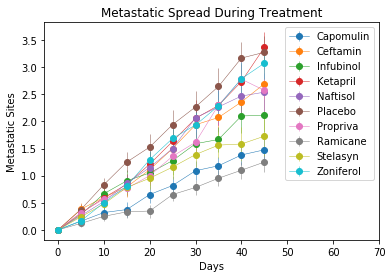

In [16]:
#Metastatic Sites Scatter Plot
#Create metastatic sites x axis
total_time = met_mean_pivot.index[-1]
x_axis = np.arange(0, total_time + 5, 5)

#Create metastatic sites y axis and plot metastatic sites data
drugs = met_mean_pivot.columns

fig, ax = plt.subplots()

for drug in drugs:
    error = met_se_pivot[drug]
    mean = met_mean_pivot[drug]
    met_response = plt.errorbar(x_axis, mean, error, marker="o", ls='-', lw=.5, label = drug)

#Format metastatic sites scatter plot
plt.xlim(-3, total_time +25)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Days")
plt.ylabel("Metastatic Sites")
plt.legend(loc='best')

#Save and display metastatic sites scatter plot
plt.savefig(os.path.join("Images","metastaticspread.png"))
plt.show()

## Survival Rates

In [23]:
#Mouse Count
# Create the mouse count dataframe
mouse_data = study_data.groupby(["Drug", "Timepoint"]) ["Mouse ID"].count()
mouse_count = mouse_data.reset_index()

#Pivot mouse count dataframe
mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

#Preview the mouse count dataframe
mouse_count_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


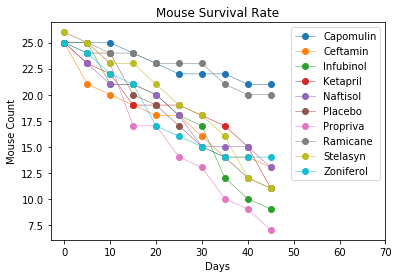

In [27]:
#Mouse Count Plot
#Create mouse count x axis
total_time = mouse_count_pivot.index[-1]
x_axis = np.arange(0, total_time + 5, 5)

#Create metastatic sites y axis and plot metastatic sites data
drugs = mouse_count_pivot.columns

fig, ax = plt.subplots()

for drug in drugs:
    count = mouse_count_pivot[drug]
    met_response = plt.errorbar(x_axis, count, marker="o", ls='-', lw=.5, label = drug)

#Format metastatic sites scatter plot
plt.xlim(-3, total_time +25)
plt.title("Mouse Survival Rate")
plt.xlabel("Days")
plt.ylabel("Mouse Count")
plt.legend(loc='best')

#Save and display metastatic sites scatter plot
plt.savefig(os.path.join("Images","survival.png"))
plt.show()

## Summary Bar Graph

In [ ]:
#Percent Changes
#Calculate the percent changes for each drug
for drug in drugs:
    start = tumor_se_pivot[drug]
    


# Display the data to confirm


In [ ]:

#Percent Changes
# Create the tumor change dataframe
tumor_data = study_data.groupby(["Drug", "Timepoint"]) ["Tumor Volume (mm3)"]
tumor_mean = tumor_data.mean()
tumor_mean = tumor_mean.reset_index()

#Pivot tumor mean dataframe
tumor_mean_pivot = tumor_mean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

#Preview tumor standard error dataframe
tumor_mean_pivot.head()


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)